In [1]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama

from spatialviewpy import prepare10xVisium_from_scanpy

from os import listdir, path
from collections import OrderedDict

from scipy.io import mmwrite, mmread
from zipfile import ZipFile
import requests
import os
import csv
import shutil
import json
import gzip

import warnings
warnings.filterwarnings('ignore')

In [89]:
adata = sc.read_10x_h5(path.join("../data", "MP19", 'raw_feature_bc_matrix.h5'))
adata2 = sc.read_10x_h5(path.join("../data", "MP19", 'filtered_feature_bc_matrix.h5'))
adata_hu = sc.read_10x_h5(path.join("../data", "MPH1", 'raw_feature_bc_matrix.h5'))
adata

AnnData object with n_obs × n_vars = 4992 × 36945
    var: 'gene_ids', 'feature_types', 'genome'

In [13]:
adata.to_df()

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,DEPRECATED_ENSG00000253368,DEPRECATED_ENSG00000253958,DEPRECATED_ENSG00000254402,DEPRECATED_ENSG00000268738,DEPRECATED_ENSG00000273820,DEPRECATED_ENSG00000277494,DEPRECATED_ENSG00000277632,DEPRECATED_ENSG00000280071,DEPRECATED_ENSG00000284667,DEPRECATED_ENSG00000284704
AAACAACGAATAGTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TTGTTTGTATTACACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
[g for g in adata.to_df().columns if (g not in adata2.to_df().columns) and (not g.startswith("DEPRECATED"))]

KeyboardInterrupt: 

In [30]:
filt_genes = [g for g in set(adata.to_df().columns).difference(set(adata2.to_df().columns)) if not g.startswith("DEPRECATED")]
len(filt_genes)

18650

In [33]:
colsums = adata.to_df()[filt_genes].sum()
colsort = colsums.sort_values(ascending=False).index
adata.to_df()[colsort]

,SERF1A,MTRNR2L12,EEF1A1,NACA,FAM153B,TMSB10,PRKAR1A,CDK2AP1,TPT1,CSNK1A1,...,AC062021.1,AC131571.1,AC103564.1,AC008581.1,AC087749.1,AL359317.2,LINC01925,AC011131.1,LINC00622,AC116348.2
AAACAACGAATAGTTC-1,8.0,1.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAAGTATCTCCCA-1,30.0,6.0,8.0,4.0,0.0,3.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,36.0,11.0,5.0,3.0,6.0,2.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,73.0,26.0,17.0,5.0,8.0,3.0,4.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,92.0,19.0,18.0,11.0,7.0,3.0,2.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,114.0,44.0,26.0,7.0,9.0,10.0,8.0,10.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCCATACAACT-1,114.0,55.0,47.0,18.0,15.0,21.0,6.0,11.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTGTATTACACG-1,17.0,9.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


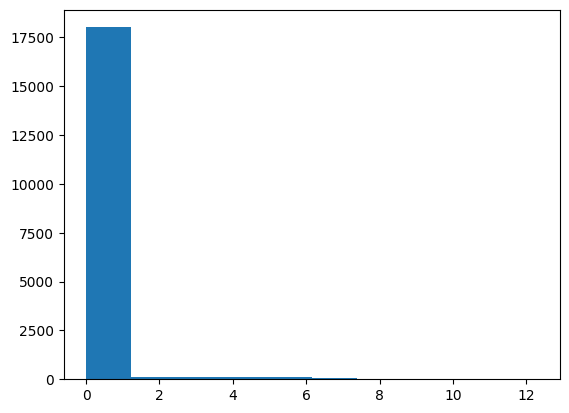

In [38]:
plt.hist(np.log(1 + colsums.sort_values(ascending=False)))
_ = plt.show()

In [43]:
(colsums > 0).sum()

np.int64(778)

In [51]:

adata.to_df()[colsort].sum().sum()

np.float32(638884.0)

In [54]:
adata_hu.to_df()[colsort].sum().sum()

np.float32(6525818.0)

In [57]:
adata.to_df()[colsort].sum().sum()/adata.to_df().sum().sum()

np.float32(0.14672953)

In [58]:
adata_hu.to_df()[colsort].sum().sum() / adata_hu.to_df().sum().sum()

np.float32(0.19282258)

In [59]:
colsort

Index(['SERF1A', 'MTRNR2L12', 'EEF1A1', 'NACA', 'FAM153B', 'TMSB10', 'PRKAR1A',
       'CDK2AP1', 'TPT1', 'CSNK1A1',
       ...
       'AC062021.1', 'AC131571.1', 'AC103564.1', 'AC008581.1', 'AC087749.1',
       'AL359317.2', 'LINC01925', 'AC011131.1', 'LINC00622', 'AC116348.2'],
      dtype='object', length=18653)

In [176]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["rp"] = adata.var_names.str.startswith("RP[SL]")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt","rp"], inplace=True)

adata_hu.var_names_make_unique()
adata_hu.var["mt"] = adata_hu.var_names.str.startswith("MT-")
adata_hu.var["rp"] = adata_hu.var_names.str.startswith("RP[SL]")
sc.pp.calculate_qc_metrics(adata_hu, qc_vars=["mt","rp"], inplace=True)

adata2.var_names_make_unique()
adata2.var["mt"] = adata2.var_names.str.startswith("MT-")
adata2.var["rp"] = adata2.var_names.str.startswith("RP[SL]")
sc.pp.calculate_qc_metrics(adata2, qc_vars=["mt","rp"], inplace=True)

adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_rp,log1p_total_counts_rp,pct_counts_rp
AAACAACGAATAGTTC-1,217,5.384495,268.0,5.594711,37.686567,56.343284,93.656716,100.000000,0.0,0.0,0.0,0.0,0.0,0.0
AAACAAGTATCTCCCA-1,465,6.144186,654.0,6.484635,32.721713,44.189602,59.480122,100.000000,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,582,6.368187,828.0,6.720220,29.710145,41.787440,53.864734,90.096618,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,948,6.855409,1587.0,7.370231,31.190926,39.571519,52.173913,71.770636,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,8,2.197225,14.0,2.708050,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,958,6.865891,1554.0,7.349231,29.343629,37.837838,50.707851,70.527671,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,1218,7.105786,2342.0,7.759187,31.725021,39.111870,49.743809,69.342442,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCCATACAACT-1,1578,7.364547,3060.0,8.026497,27.450980,34.673203,44.901961,64.771242,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTGTATTACACG-1,68,4.234107,102.0,4.634729,82.352941,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
import copy 

adatap = copy.deepcopy(adata) 

sc.pp.filter_cells(adatap, max_counts=99)
adatap.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_rp,log1p_total_counts_rp,pct_counts_rp,n_counts
AAACAGAGCGACTCCT-1,8,2.197225,14.0,2.708050,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
AAACCGGAAATGTTAA-1,3,1.386294,4.0,1.609438,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
AAACCTAAGCAGCCGG-1,67,4.219508,82.0,4.418840,79.268293,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0
AAACGCTGGGCACGAC-1,1,0.693147,1.0,0.693147,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AAAGGGATGTAGCAAG-1,8,2.197225,26.0,3.295837,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGAACCTAATCCG-1,19,2.995732,40.0,3.713572,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
TTGTGGTATAGGTATG-1,7,2.079442,11.0,2.484907,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
TTGTTCAGTGTGCTAC-1,50,3.931826,67.0,4.219508,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
TTGTTGGCAATGACTG-1,71,4.276666,80.0,4.394449,73.750000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0


In [94]:
adata2.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_rp,log1p_total_counts_rp,pct_counts_rp
AAACACCAATAACTGC-1,863,6.761573,1356.0,7.213032,27.949853,37.168142,51.106195,73.230088,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,7,2.079442,7.0,2.079442,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGGGTCTATATT-1,600,6.398595,865.0,6.763885,28.439306,40.000000,53.757225,88.439306,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGTGTTCCTGGG-1,217,5.384495,285.0,5.655992,41.403509,58.947368,94.035088,100.000000,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTTCCCGGATT-1,758,6.632002,1203.0,7.093405,28.927681,38.902743,53.615960,78.553616,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCAGTGTGCTAC-1,42,3.761200,46.0,3.850148,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTGTGTGTCAAGA-1,42,3.761200,44.0,3.806663,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCACATCCAGG-1,883,6.784457,1304.0,7.173958,24.769939,33.819018,47.622699,70.628834,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,1124,7.025538,1981.0,7.591862,27.612317,35.739525,47.349823,68.500757,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
adatap2 = copy.deepcopy(adata2) 

sc.pp.filter_cells(adatap2, max_counts=99)
adatap2.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_rp,log1p_total_counts_rp,pct_counts_rp,n_counts
AAACAGAGCGACTCCT-1,7,2.079442,7.0,2.079442,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
AAACCTAAGCAGCCGG-1,58,4.077537,65.0,4.189655,87.692308,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0
AAAGGGATGTAGCAAG-1,7,2.079442,7.0,2.079442,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
AAAGGTAAGCTGTACC-1,5,1.791759,5.0,1.791759,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
AAAGTGTGATTTATCT-1,10,2.397895,10.0,2.397895,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGCAGCCACGTCA-1,72,4.290459,80.0,4.394449,72.500000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
TTGTGGTATAGGTATG-1,6,1.945910,6.0,1.945910,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
TTGTTCAGTGTGCTAC-1,42,3.761200,46.0,3.850148,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
TTGTTGTGTGTCAAGA-1,42,3.761200,44.0,3.806663,100.000000,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0


In [146]:
(
    adata.var
    .filter(items = [g for g in adata.var.index if not g.startswith("DEPRECATED")], axis=0)
    .filter(items = [g for g in adata.var.index if g not in adata2.var.index], axis = 0)
    .sort_values('mean_counts')
)

,gene_ids,feature_types,genome,mt,rp,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
AL358334.3,ENSG00000258745,Gene Expression,GRCh38,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
FRMD6-AS2,ENSG00000258537,Gene Expression,GRCh38,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
LINC02310,ENSG00000258808,Gene Expression,GRCh38,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AL358332.1,ENSG00000258942,Gene Expression,GRCh38,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
LINC00640,ENSG00000258479,Gene Expression,GRCh38,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
FAM153B,ENSG00000182230,Gene Expression,GRCh38,False,False,3526,3.194311,1.433729,29.366987,15946.0,9.677026
NACA,ENSG00000196531,Gene Expression,GRCh38,False,False,3348,4.046675,1.618730,32.932692,20201.0,9.913537
EEF1A1,ENSG00000156508,Gene Expression,GRCh38,False,False,3658,8.601362,2.261905,26.722756,42938.0,10.667536
MTRNR2L12,ENSG00000269028,Gene Expression,GRCh38,False,False,3904,14.292869,2.727387,21.794872,71350.0,11.175366


In [150]:
adatap.var.sort_values('mean_counts')

,gene_ids,feature_types,genome,mt,rp,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
AC083841.1,ENSG00000253196,Gene Expression,GRCh38,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
GLI4,ENSG00000250571,Gene Expression,GRCh38,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
MINCR,ENSG00000253716,Gene Expression,GRCh38,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC138696.2,ENSG00000272172,Gene Expression,GRCh38,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
RHPN1-AS1,ENSG00000254389,Gene Expression,GRCh38,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
EEF1A1,ENSG00000156508,Gene Expression,GRCh38,False,False,3658,8.601362,2.261905,26.722756,42938.0,10.667536
MTRNR2L12,ENSG00000269028,Gene Expression,GRCh38,False,False,3904,14.292869,2.727387,21.794872,71350.0,11.175366
CLU,ENSG00000120885,Gene Expression,GRCh38,False,False,3830,19.273237,3.009302,23.277244,96212.0,11.474319
ACTB,ENSG00000075624,Gene Expression,GRCh38,False,False,4100,23.641226,3.204421,17.868590,118017.0,11.678593


In [102]:
adatap.to_df().sum().sum()

np.float32(36381.0)

In [128]:
(adatap.to_df()[colsort].sum(axis=1).sort_values()  / adatap.obs['total_counts']).sort_values()

AAACGCTGGGCACGAC-1    0.0
GGCGCACAGTTTACCT-1    0.0
TTCCCAAAGTACTGAT-1    0.0
ATCAGGTAGCTGACAG-1    0.0
TGAGCTCAACTGTATA-1    0.0
                     ... 
TCATAAGTCCAAGAAG-1    NaN
TCCCAATATCGACGAC-1    NaN
TCCTGCAGCCGCCAAT-1    NaN
TGTTAACAAAGTGACT-1    NaN
TTGAAGTGCATCTACA-1    NaN
Length: 1281, dtype: float32

In [130]:
adatap.obs.sort_values('total_counts')

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_rp,log1p_total_counts_rp,pct_counts_rp,n_counts
AAAGTGCCATCAATTA-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
TTGAAGTGCATCTACA-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
CTTCATCACCAGGGCT-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
ACGTTTCGGTGCACTT-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
CCTACAGTTGAGGGAG-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAATGAGATACAGCA-1,88,4.488636,97.0,4.584968,60.824742,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0
CTACTATCTTTCAGAG-1,52,3.970292,97.0,4.584968,97.938144,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0
GATGTGTTGTCACAAG-1,79,4.382027,97.0,4.584968,70.103093,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0
AGTTATTGAAAGGTAA-1,69,4.248495,98.0,4.595120,80.612245,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0


In [126]:
adatab = copy.deepcopy(adata) 

sc.pp.filter_cells(adatab, min_counts=100)
(adatab.to_df()[colsort].sum(axis=1) / adatab.obs['total_counts']).sort_values()

AGAGTTGCAGGCCTCC-1    0.084112
CTCCTAGTAATCGTGA-1    0.086207
TTCGTGGGCTGGAAGC-1    0.086207
ATCCACTTTCAGACTA-1    0.087452
TGAATGTCAGCCGGCC-1    0.091222
                        ...   
ACTTACGCATCCACGC-1    0.466019
ACCTACAGTATGTGGT-1    0.495652
GACCGACGTGAAAGCA-1    0.500000
AGTTAAGTCAACCGCT-1    0.504425
AAATTCCAGGTCCAAA-1    0.540000
Length: 3711, dtype: float32

In [121]:
adatab.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_rp,log1p_total_counts_rp,pct_counts_rp,n_counts
AAACAACGAATAGTTC-1,217,5.384495,268.0,5.594711,37.686567,56.343284,93.656716,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,268.0
AAACAAGTATCTCCCA-1,465,6.144186,654.0,6.484635,32.721713,44.189602,59.480122,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,654.0
AAACAATCTACTAGCA-1,582,6.368187,828.0,6.720220,29.710145,41.787440,53.864734,90.096618,0.0,0.0,0.0,0.0,0.0,0.0,828.0
AAACACCAATAACTGC-1,948,6.855409,1587.0,7.370231,31.190926,39.571519,52.173913,71.770636,0.0,0.0,0.0,0.0,0.0,0.0,1587.0
AAACAGCTTTCAGAAG-1,1084,6.989335,1853.0,7.525101,27.576902,36.157582,48.300054,68.483540,0.0,0.0,0.0,0.0,0.0,0.0,1853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,958,6.865891,1554.0,7.349231,29.343629,37.837838,50.707851,70.527671,0.0,0.0,0.0,0.0,0.0,0.0,1554.0
TTGTTTCATTAGTCTA-1,1218,7.105786,2342.0,7.759187,31.725021,39.111870,49.743809,69.342442,0.0,0.0,0.0,0.0,0.0,0.0,2342.0
TTGTTTCCATACAACT-1,1578,7.364547,3060.0,8.026497,27.450980,34.673203,44.901961,64.771242,0.0,0.0,0.0,0.0,0.0,0.0,3060.0
TTGTTTGTATTACACG-1,68,4.234107,102.0,4.634729,82.352941,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,102.0


In [ ]:
def gene_detection_rate(adata):
    return (adata.to_df() > 0).sum(axis=0) / adata.shape[0]  # Spots where gene is detected

# Compute detection rates
raw_detection = gene_detection_rate(adata)
filtered_detection = gene_detection_rate(adata2)

# Convert to DataFrame for easy comparison
detection_df = pd.DataFrame({"Raw": raw_detection, "Filtered": filtered_detection}, index=adata.var.index).dropna().sort_values('Filtered')
detection_df


,Raw,Filtered
TSPY1,0.000000,0.000000
TBL1Y,0.000000,0.000000
AMELY,0.000000,0.000000
PCDH11Y,0.000000,0.000000
F8A1,0.000000,0.000000
...,...,...
APOD,0.725962,0.679462
THBS1,0.731771,0.692585
DDX5,0.741386,0.707677
CLU,0.767228,0.709974


In [161]:
raw_mean_expression = adata.to_df().mean(axis=0)
filtered_mean_expression = adata2.to_df().mean(axis=0)

expression_df = pd.DataFrame({"Raw": raw_mean_expression, "Filtered": filtered_mean_expression}, index=adata.var.index).dropna().sort_values('Filtered')
expression_df

,Raw,Filtered
AMELY,0.000000,0.000000
PCDH11Y,0.000000,0.000000
ZFY,0.000000,0.000000
SRY,0.000000,0.000000
PUSL1,0.000000,0.000000
...,...,...
DDX5,6.713141,7.593832
THBS1,6.840745,7.884514
APOD,6.852163,8.195539
CLU,19.273237,24.827755


In [159]:
raw_dropout = 1 - raw_detection
filtered_dropout = 1 - filtered_detection

dropout_df = pd.DataFrame({"Raw": raw_dropout, "Filtered": filtered_dropout}, index=adata.var.index).dropna().sort_values('Filtered')
dropout_df

,Raw,Filtered
ACTB,0.178686,0.209646
CLU,0.232772,0.290026
DDX5,0.258614,0.292323
THBS1,0.268229,0.307415
APOD,0.274038,0.320538
...,...,...
USP9Y,1.000000,1.000000
DDX3Y,1.000000,1.000000
TMSB4Y,1.000000,1.000000
KDM5D,1.000000,1.000000


ValueError: x and y must be the same size

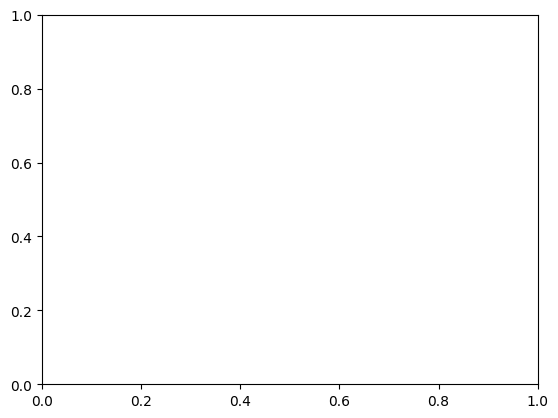

In [163]:
import matplotlib.pyplot as plt

plt.scatter(raw_mean_expression, filtered_mean_expression, alpha=0.5)
plt.xlabel("Raw Mean Expression")
plt.ylabel("Filtered Mean Expression")
plt.title("Impact of Probe Filtering on Gene Expression")
plt.plot([0, max(raw_mean_expression)], [0, max(raw_mean_expression)], linestyle="--", color="red")  # Identity line
plt.show()

(array([1.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00, 3.0000e+00,
        1.2484e+04, 3.8770e+03, 1.1110e+03, 4.0400e+02, 4.9000e+01]),
 array([-0.05725381, -0.04740135, -0.0375489 , -0.02769644, -0.01784398,
        -0.00799153,  0.00186093,  0.01171339,  0.02156584,  0.0314183 ,
         0.04127076]),
 <BarContainer object of 10 artists>)

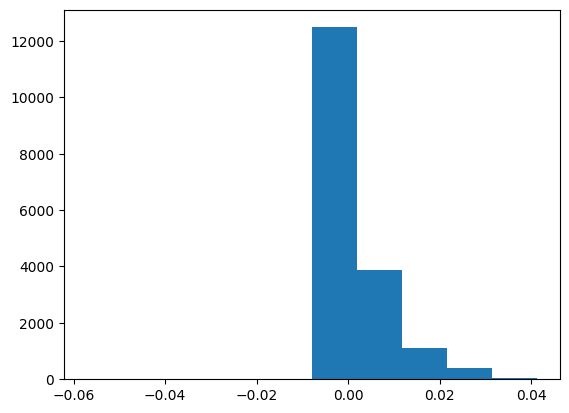

In [166]:
plt.hist(raw_dropout - filtered_dropout)

In [173]:
adata.obs.sum(axis=0)

n_genes_by_counts              2.519010e+06
log1p_n_genes_by_counts        2.639481e+04
total_counts                   4.354161e+06
log1p_total_counts             2.851837e+04
pct_counts_in_top_50_genes     2.536293e+05
pct_counts_in_top_100_genes    3.033705e+05
pct_counts_in_top_200_genes    3.686539e+05
pct_counts_in_top_500_genes    4.468223e+05
total_counts_mt                0.000000e+00
log1p_total_counts_mt          0.000000e+00
pct_counts_mt                  0.000000e+00
total_counts_rp                0.000000e+00
log1p_total_counts_rp          0.000000e+00
pct_counts_rp                  0.000000e+00
dtype: float64

In [177]:
adata_hu.obs.sum(axis=0)

n_genes_by_counts              1.414544e+07
log1p_n_genes_by_counts        3.816258e+04
total_counts                   3.384364e+07
log1p_total_counts             4.090919e+04
pct_counts_in_top_50_genes     1.122757e+05
pct_counts_in_top_100_genes    1.431815e+05
pct_counts_in_top_200_genes    1.856023e+05
pct_counts_in_top_500_genes    2.767051e+05
total_counts_mt                0.000000e+00
log1p_total_counts_mt          0.000000e+00
pct_counts_mt                  0.000000e+00
total_counts_rp                0.000000e+00
log1p_total_counts_rp          0.000000e+00
pct_counts_rp                  0.000000e+00
dtype: float64

In [178]:
95607839*2

191215678